## Google Play Store Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apps=pd.read_csv('googleplaystore.csv')
reviews=pd.read_csv('googleplaystore_user_reviews.csv')

In [3]:
apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Data Cleaning - apps

In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
apps['Reviews']=pd.to_numeric(apps['Reviews'], errors='coerce')

In [6]:
apps['Price']=apps['Price'].str.replace('$','', regex=False)
apps['Price']=pd.to_numeric(apps['Price'], errors='coerce')

In [7]:
apps['Size']=apps['Size'].str.replace('M','', regex=False)
apps['Size']=apps['Size'].str.replace('k','', regex=False)
apps['Size']=pd.to_numeric(apps['Size'], errors='coerce')

In [8]:
apps['Installs']=apps['Installs'].str.replace('+', '', regex=False)
apps['Installs']=apps['Installs'].str.replace(',', '', regex=False)
apps['Installs']=pd.to_numeric(apps['Installs'], errors='coerce')

In [9]:
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              1
Size              1696
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
cols=['App','Category','Type','Content Rating','Genres']
apps=apps.drop_duplicates(subset=cols, keep='first')

In [11]:
apps=apps.drop(['Current Ver','Android Ver','Last Updated'],axis=1)

In [12]:
apps.dropna(subset=['Rating','Size'],inplace=True)

In [13]:
apps.fillna(apps['Content Rating'].mode()[0], inplace=True)

In [14]:
apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [15]:
apps.describe()

,Rating,Reviews,Size,Installs,Price
count,7091.000000,7.091000e+03,7091.000000,7.091000e+03,7091.000000
mean,4.162615,1.684288e+05,37.406205,4.806713e+06,1.164387
std,0.557455,1.246946e+06,96.973583,2.856537e+07,18.115734
min,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000
25%,4.000000,8.600000e+01,5.700000,1.000000e+04,0.000000
50%,4.300000,1.619000e+03,15.000000,1.000000e+05,0.000000
75%,4.500000,2.815100e+04,35.000000,1.000000e+06,0.000000
max,5.000000,4.489172e+07,994.000000,1.000000e+09,400.000000


### Data cleaning - reviews

In [16]:
reviews.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [17]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [18]:
reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [19]:
reviews.dropna(inplace=True)

In [20]:
cols=['App','Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity']
reviews=reviews.drop_duplicates(subset=cols, keep='first')

In [21]:
reviews.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

### Analyze ratings and their distribution

<Figure size 800x500 with 0 Axes>

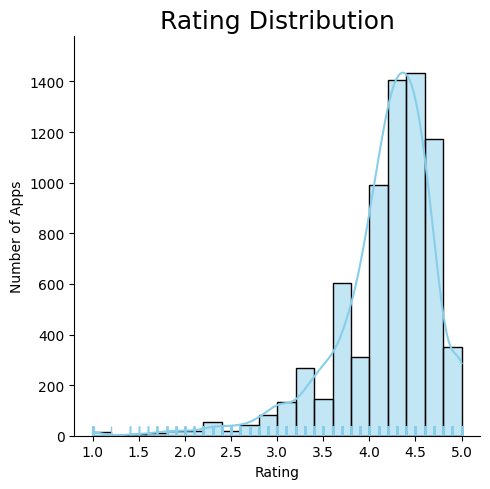

In [22]:
plt.figure(figsize=(8,5))
def rating_distribution():
    sns.displot(apps['Rating'],bins=20,kde=True,rug=True,color='skyblue')
    plt.title('Rating Distribution',fontsize=18)
    plt.xlabel('Rating')
    plt.ylabel('Number of Apps')
    plt.tight_layout()


rating_distribution()
plt.show()

### Identify most popular app categories

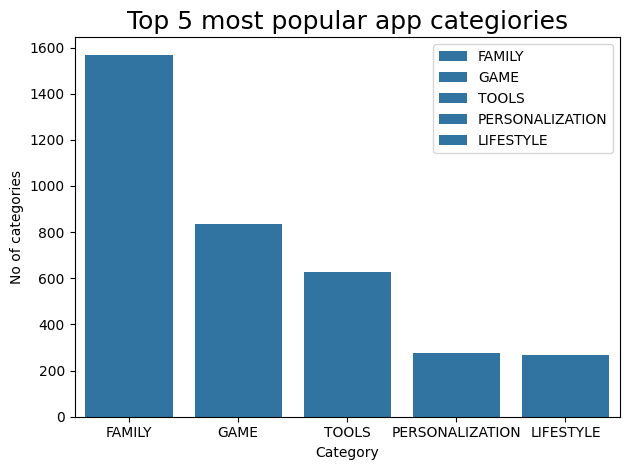

In [23]:
pop_cat=apps['Category'].value_counts().head(5)

def pop_categories():
    sns.barplot(x=pop_cat.index,y=pop_cat.values,label=pop_cat.index)
    plt.title('Top 5 most popular app categiories',fontsize=18)
    plt.ylabel('No of categories')
    plt.tight_layout()

pop_categories()
plt.show()

### Explore correlation between installs, reviews, and ratings

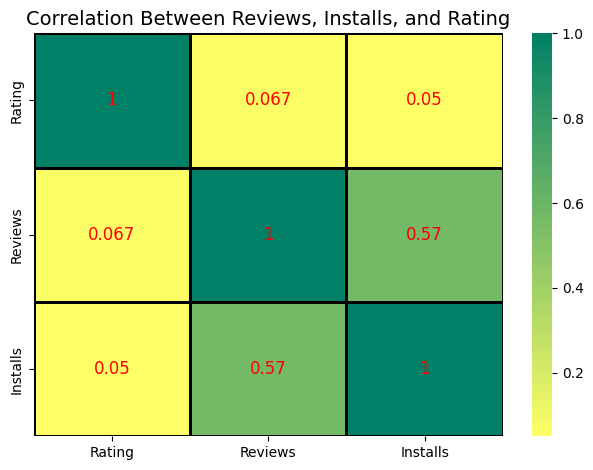

In [24]:
corr=apps[['Rating','Reviews','Installs']].corr()

def correlation():
    sns.heatmap(corr,annot=True,cmap='summer_r',annot_kws={'fontsize':12,'color':'r'},linewidth=1,linecolor='black')
    plt.title('Correlation Between Reviews, Installs, and Rating',fontsize=14)
    plt.tight_layout()


correlation()
plt.show()


### Check app pricing trends (free vs paid)

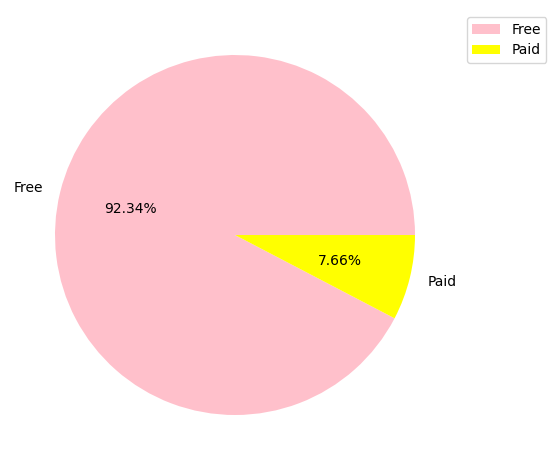

In [25]:
types=apps['Type'].value_counts()

def trends():
    plt.pie(types.values,labels=types.index,autopct="%1.2f%%",colors=['pink','yellow'],)
    plt.legend(loc="upper left",fontsize=10,bbox_to_anchor=(1,1))
    plt.tight_layout()

trends()
plt.show()

### Do paid apps have higher ratings than free apps?

C:\Users\ADITYA PAWAR\AppData\Local\Temp\ipykernel_20856\3387525979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type',y='Rating',data=apps,palette='Set2',showmeans=True,meanprops={'marker':'o','markeredgecolor':'blue'},


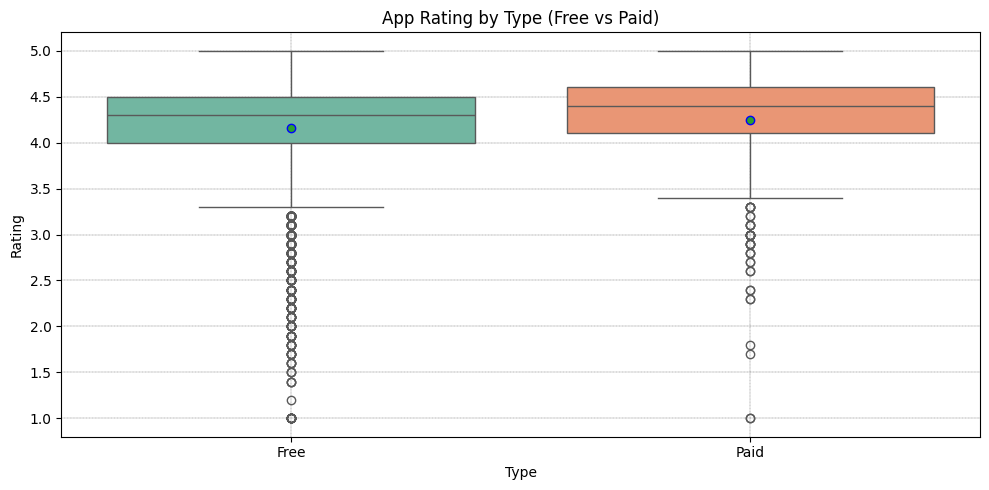

In [61]:
plt.figure(figsize=(10,5))
def freevspaid():
    sns.boxplot(x='Type',y='Rating',data=apps,palette='Set2',showmeans=True,meanprops={'marker':'o','markeredgecolor':'blue'},
           linewidth=1)
    plt.title('App Rating by Type (Free vs Paid)')
    plt.grid(color='black',linestyle='--',linewidth=0.2)
    plt.tight_layout()

freevspaid()
plt.show()

### What is the distribution of sentiment across reviews?

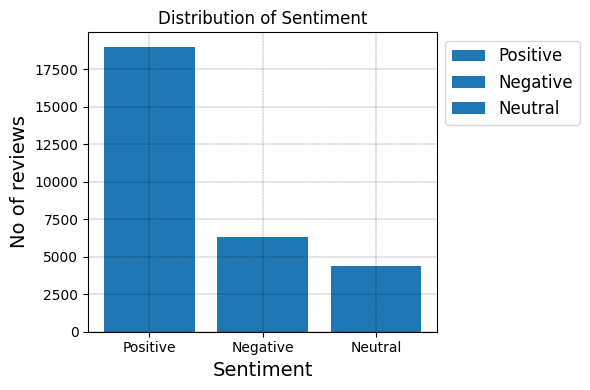

In [60]:
sentiments=reviews['Sentiment'].value_counts()

plt.figure(figsize=(6,4))
def sentiment():
    plt.bar(sentiments.index,sentiments.values,label=sentiments.index)
    plt.xlabel("Sentiment",fontsize=14)
    plt.ylabel("No of reviews",fontsize=14)
    plt.legend(loc="upper left",fontsize=12,bbox_to_anchor=(1,1))
    plt.grid(color='black',linestyle='--',linewidth=0.2)
    plt.title('Distribution of Sentiment')
    plt.tight_layout()

sentiment()
plt.show()

### Do highly rated apps have more positive sentiment reviews?

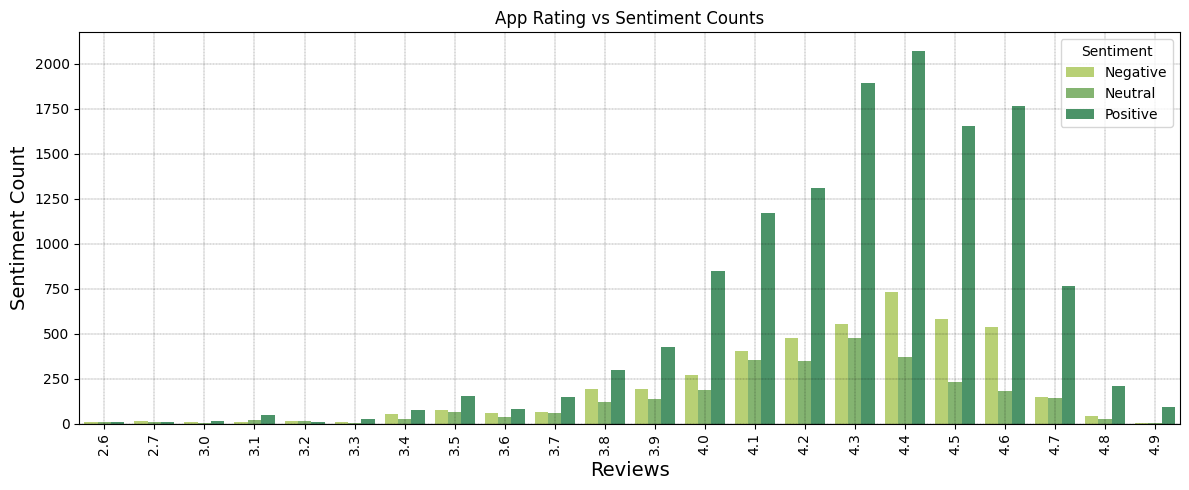

In [73]:
merge=apps.merge(reviews,on='App',how='inner')
sentiment_count=merge.groupby(['Rating','Sentiment']).size().reset_index(name='count')
plt.figure(figsize=(12,5))

def Sentimentcount():
    sns.barplot(x='Rating',y='count',data=sentiment_count,hue='Sentiment',palette='summer_r')
    plt.xticks(rotation=90)
    plt.xlabel("Reviews",fontsize=14)
    plt.ylabel("Sentiment Count",fontsize=14)
    plt.grid(color='black',linestyle='--',linewidth=0.2)
    plt.title('App Rating vs Sentiment Counts')
    plt.tight_layout()

Sentimentcount()
plt.show()